<a href="https://colab.research.google.com/github/Ananassio/Data-Science_lab/blob/main/Project/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A first look at the data

In [2]:
#get data from server
!wget --no-check-certificate https://www.keuper-labs.org/project_ss22.zip

--2022-05-19 13:27:41--  https://www.keuper-labs.org/project_ss22.zip
Resolving www.keuper-labs.org (www.keuper-labs.org)... 91.250.118.129
Connecting to www.keuper-labs.org (www.keuper-labs.org)|91.250.118.129|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 70859177 (68M) [application/zip]
Saving to: ‘project_ss22.zip’

project_ss22.zip    100%[===================>]  67.58M  11.3MB/s    in 6.6s    

2022-05-19 13:27:48 (10.2 MB/s) - ‘project_ss22.zip’ saved [70859177/70859177]



In [3]:
#unpack
!unzip project_ss22.zip

Archive:  project_ss22.zip
   creating: dressipi_recsys2022/
  inflating: dressipi_recsys2022/candidate_items.csv  
  inflating: dressipi_recsys2022/item_features.csv  
  inflating: dressipi_recsys2022/test_leaderboard_sessions.csv  
  inflating: dressipi_recsys2022/test_final_sessions.csv  
  inflating: dressipi_recsys2022/README.txt  
  inflating: dressipi_recsys2022/train_purchases.csv  
  inflating: dressipi_recsys2022/train_sessions.csv  
  inflating: dressipi_recsys2022/README_win.txt  


In [4]:
#Importieren der nötigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# Importieren und zuweisung der Daten
items = pd.read_csv('dressipi_recsys2022/candidate_items.csv')
features = pd.read_csv('dressipi_recsys2022/item_features.csv')
train_purchases = pd.read_csv('dressipi_recsys2022/train_purchases.csv')
train_sessions = pd.read_csv('dressipi_recsys2022/train_sessions.csv')
test_leaderboard_sessions = pd.read_csv('dressipi_recsys2022/test_leaderboard_sessions.csv')

## have a first look



---


Hier werden zunächst die Datensätze einmal ausgegebn, um einen Überblick 
zubekommen wie diese aufgebaut sind.
In dem items Datensatz sind die item ids, welche in bei den testsessions gekauft wurden 

In [6]:
items.head()

,item_id
0,4
1,8
2,9
3,19
4,20


In [7]:
#how many items do we have?
items.describe()

,item_id
count,4990.000000
mean,14007.035271
std,8218.231425
min,4.000000
25%,6833.500000
50%,14108.500000
75%,21200.000000
max,28137.000000




---


In dem features Dataset sind die entsprechenden item features der jeweiligen items aufgelistet. Dabei werden die feature Kategorien wie Farbe, Ausschnitt, etc mit einer value id z.B. grün beschrieben. Die einzelnen items haben mehrere Kategorien, welche die items beschreiben, siehe hier z.B. item 2 hat 13 feature Kategorien.

In [10]:
features.head(13)

,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75
5,2,29,123
6,2,16,38
7,2,50,76
8,2,61,462
9,2,53,6


In [ ]:
features[features['feature_category_id'] == 30]

,item_id,feature_category_id,feature_value_id
129,10,30,564
134,10,30,482
153,11,30,847
154,11,30,478
156,11,30,715
...,...,...,...
471557,28133,30,482
471561,28133,30,194
471590,28135,30,564
471593,28135,30,478


In [ ]:
features[:100].pivot(index='item_id',columns='feature_category_id')

feature_value_id                                           \
feature_category_id               3      4      5      7      11     15    16   
item_id                                                                         
2                                NaN    NaN    NaN  394.0    NaN    NaN  38.0   
3                              889.0  618.0  605.0  452.0  859.0    NaN   NaN   
4                              793.0  618.0  605.0  837.0    NaN    NaN   NaN   
7                                NaN    NaN    NaN  536.0    NaN  133.0   NaN   
8                              793.0  618.0  605.0  798.0  735.0    NaN   NaN   

                                          ...                              \
feature_category_id     17     18     19  ...     56     59     61     62   
item_id                                   ...                               
2                      NaN    NaN    NaN  ...  365.0    NaN  462.0  801.0   
3                    378.0  817.0  254.0  ...  365.0  180.0  706.0    NaN   
4                    378.0  289.0  148.0  ...  365.0  180.0  462.0    NaN   
7                      NaN    NaN   33.0  ...  153.0    NaN  706.0    NaN   
8                    378.0  817.0  700.0  ...  365.0  856.0  462.0    NaN   

                                                              
feature_category_id     63     65     68     69    72     73  
item_id                                                       
2                      NaN    NaN  351.0  885.0  75.0    NaN  
3                    861.0  521.0   14.0  592.0  75.0  544.0  
4                    861.0  521.0  373.0  538.0  75.0  544.0  
7                    816.0    NaN  739.0  592.0  75.0    NaN  
8                    861.0  521.0  351.0  592.0  75.0  544.0  

[5 rows x 33 columns]

In [ ]:
dup = features.duplicated()

In [ ]:
dup.value_counts()

False    471751
dtype: int64

because there are some duplicated indexes, the mean index was used to generate the mean value of the feature value ids

In [ ]:
features.pivot_table(index='item_id',columns='feature_category_id', aggfunc='mean')

feature_value_id                                        \
feature_category_id               1     2      3      4      5   6      7    
item_id                                                                      
2                                NaN   NaN    NaN    NaN    NaN NaN  394.0   
3                                NaN   NaN  889.0  618.0  605.0 NaN  452.0   
4                                NaN   NaN  793.0  618.0  605.0 NaN  837.0   
7                                NaN   NaN    NaN    NaN    NaN NaN  536.0   
8                                NaN   NaN  793.0  618.0  605.0 NaN  798.0   
...                              ...   ...    ...    ...    ...  ..    ...   
28139                            NaN   NaN  793.0  618.0  605.0 NaN  798.0   
28140                            NaN  53.0    NaN    NaN    NaN NaN    NaN   
28141                          461.0   NaN  889.0  719.0  605.0 NaN    2.0   
28142                            NaN   NaN    NaN    NaN    NaN NaN  619.0   
28143                            NaN   NaN    NaN    NaN    NaN NaN  798.0   

                                 ...                                        \
feature_category_id  8   9   10  ...    64     65  66     67     68     69   
item_id                          ...                                         
2                   NaN NaN NaN  ...   NaN    NaN NaN    NaN  351.0  885.0   
3                   NaN NaN NaN  ...   NaN  521.0 NaN    NaN   14.0  592.0   
4                   NaN NaN NaN  ...   NaN  521.0 NaN    NaN  373.0  538.0   
7                   NaN NaN NaN  ...   NaN    NaN NaN    NaN  739.0  592.0   
8                   NaN NaN NaN  ...   NaN  521.0 NaN    NaN  351.0  592.0   
...                  ..  ..  ..  ...   ...    ...  ..    ...    ...    ...   
28139               NaN NaN NaN  ...   NaN  521.0 NaN    NaN  106.0  805.0   
28140               NaN NaN NaN  ...  80.0    NaN NaN  349.0  351.0    NaN   
28141               NaN NaN NaN  ...   NaN    NaN NaN    NaN  379.0  499.0   
28142               NaN NaN NaN  ...   NaN  610.0 NaN    NaN  895.0  740.0   
28143               NaN NaN NaN  ...   NaN    NaN NaN    NaN  351.0  499.0   

                                              
feature_category_id  70     71     72     73  
item_id                                       
2                   NaN    NaN   75.0    NaN  
3                   NaN    NaN   75.0  544.0  
4                   NaN    NaN   75.0  544.0  
7                   NaN    NaN   75.0    NaN  
8                   NaN    NaN   75.0  544.0  
...                  ..    ...    ...    ...  
28139               NaN    NaN   75.0  544.0  
28140               NaN  226.0    NaN  544.0  
28141               NaN    NaN   75.0  544.0  
28142               NaN    NaN   75.0   91.0  
28143               NaN    NaN  371.0   91.0  

[23691 rows x 73 columns]

In [ ]:
features["item_id"].describe()

count    471751.000000
mean      14058.539477
std        8107.465455
min           2.000000
25%        7060.000000
50%       14045.000000
75%       21063.000000
max       28143.000000
Name: item_id, dtype: float64



---


Der Train_purchases Datensatz beinhaltet eine item id, welche am Ende der jeweiligen session letzlich gekauft wurde. Zusätzlich gibt es dabei noch einen Zeitstempel.
Die gesamten Daten wurden in einem Zeitraum von 18 Monaten aufgezeichnet, dabei wurden Daten der ersten 17 Monate für den Trainingsdatensatz verwendet und der letzte Monat wurde für den Testdatensatz verwendet.

In [ ]:
train_purchases.head()

,session_id,item_id,date
0,3,15085,2020-12-18 21:26:47.986
1,13,18626,2020-03-13 19:36:15.507
2,18,24911,2020-08-26 19:20:32.049
3,19,12534,2020-11-02 17:16:45.92
4,24,13226,2020-02-26 18:27:44.114




---


In dem Datensatz train_session sind die item ids aufgelistet, welche innerhalb einer session angesehen wurden. Auch hier gibt es jeweils einen Zeitstempel.

In [ ]:
train_sessions.head()

,session_id,item_id,date
0,3,9655,2020-12-18 21:25:00.373
1,3,9655,2020-12-18 21:19:48.093
2,13,15654,2020-03-13 19:35:27.136
3,18,18316,2020-08-26 19:18:30.833
4,18,2507,2020-08-26 19:16:31.211




---


Auf den Daten des Datensatzes test_leaderboard_session sollen die Vorhersagen für die Bestenliste des Wettbewerbs getätigt werden. 

In [ ]:
test_leaderboard_sessions

,session_id,item_id,date
0,26,19185,2021-06-16 09:53:54.158
1,200,17089,2021-06-25 12:23:40.811
2,200,17089,2021-06-25 12:24:36.631
3,200,8060,2021-06-25 12:24:41.677
4,200,4758,2021-06-25 12:24:50.692
...,...,...,...
229349,4439653,25955,2021-06-11 10:22:57.47
229350,4439653,12179,2021-06-11 10:23:00.663
229351,4439757,2078,2021-06-30 11:42:15.073
229352,4439757,2078,2021-06-30 11:43:13.725


In [ ]:
test_sessions= pd.DataFrame(columns=['session_id']);

In [ ]:
test_sessions['session_id'] = test_leaderboard_sessions['session_id'].sort_values().unique()

In [ ]:
test_sessions

,session_id
0,26
1,200
2,205
3,495
4,521
...,...
49995,4439446
49996,4439458
49997,4439550
49998,4439653


# Erstellen eines Testscores mit zufälligen ergebnissen

Erstellen eines Zufälligen Testscores mit je 100 zufälligen Item ids pro Session. Die item ids werden hierfür aus der items liste entnommen.

In [ ]:
test = pd.DataFrame();

In [ ]:
test['session_id'] = test_leaderboard_sessions['session_id'].unique()
test  = test.loc[test.index.repeat(100)].reset_index(drop=True)
test['item_id'] = pd.DataFrame(np.random.randint(items['item_id'].min(), items['item_id'].max(), size=(len(test),1)))
test['rank'] = test.groupby('session_id').cumcount()+1
test = test.set_index('session_id')


In [ ]:
test.head(102)

,item_id,rank
session_id,,
26,7222,1
26,3446,2
26,2092,3
26,25020,4
26,2919,5
...,...,...
26,12879,98
26,20085,99
26,21527,100


In [ ]:
test.to_csv('test.csv')

### Lets take a closer look to the test_leaderboard_seesions

In [ ]:
# first count the ammount of the session numbers
A = pd.DataFrame(test_leaderboard_sessions['session_id'].value_counts().sort_values())['session_id'].value_counts()

In [ ]:
A.to_frame()

,session_id
1,17036
2,7994
3,5444
4,3766
5,2844
...,...
60,1
61,1
55,1
53,1


In [ ]:
# lets use the describe function for better analysing of the numbers 
test_leaderboard_sessions['session_id'].value_counts().sort_values().describe()

count    50000.000000
mean         4.587080
std          5.666023
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max         72.000000
Name: session_id, dtype: float64

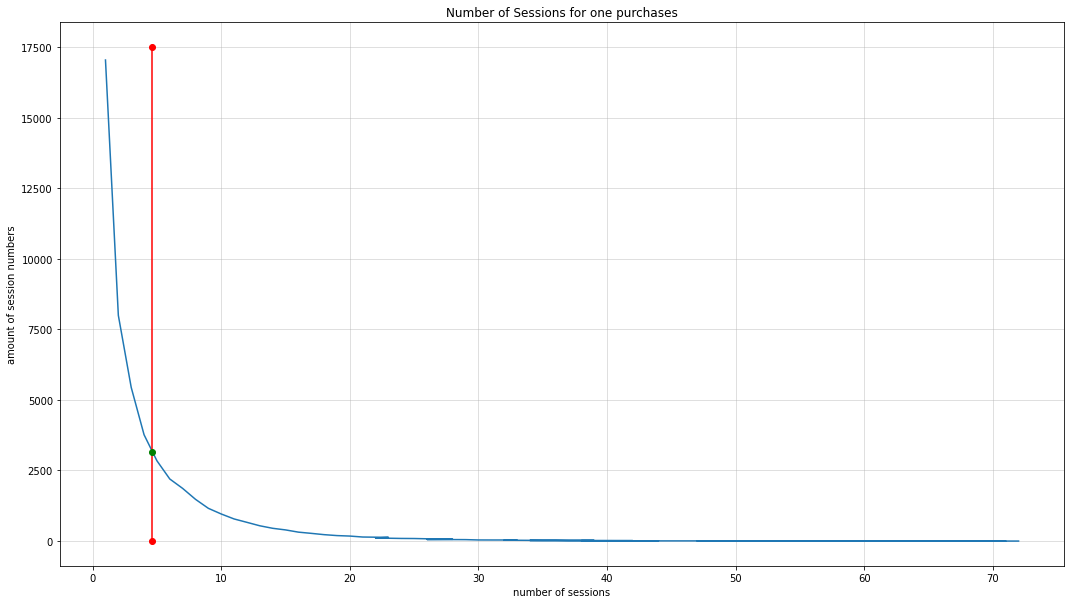

In [ ]:

# print the generated curve of the session ammounts
fig, axes = plt.subplots(figsize=(18,10))

axes.plot(A)
axes.plot([4.58708,4.58708], [0,17500], '-ro', label='line & marker')
axes.plot(4.58708,3150, 'go', label='marker only')
axes.set_xlabel('number of sessions')
axes.set_ylabel('amount of session numbers')
axes.set_title('Number of Sessions for one purchases');
axes.grid(alpha=0.5)

Da in den meisten sessions nur ein item angesehen wird, werden als nächstes die ids vorgeschlagen, wechle zuletzt in der Session angesehen wurden.

In [ ]:
test2 = pd.DataFrame();

In [ ]:
#test2['session_id'] = test_leaderboard_sessions['session_id'].unique();
idx = test_leaderboard_sessions.groupby(['session_id'])['date'].transform(max) == test_leaderboard_sessions['date']

In [ ]:
test2 = test_leaderboard_sessions[idx]

In [ ]:
test2 = test2.reset_index()

In [ ]:
test2['session_id']

0             26
1            200
2            205
3            495
4            521
          ...   
50001    4439446
50002    4439458
50003    4439550
50004    4439653
50005    4439757
Name: session_id, Length: 50006, dtype: int64

In [ ]:
test_leaderboard_sessions.head(20)

,session_id,item_id,date
0,26,19185,2021-06-16 09:53:54.158
1,200,17089,2021-06-25 12:23:40.811
2,200,17089,2021-06-25 12:24:36.631
3,200,8060,2021-06-25 12:24:41.677
4,200,4758,2021-06-25 12:24:50.692
5,205,8194,2021-06-11 00:28:07.058
6,495,6853,2021-06-14 22:13:06.741
7,521,26471,2021-06-19 13:50:03.09
8,587,22204,2021-06-01 16:43:22.80
9,721,13914,2021-06-19 18:46:57.263


In [ ]:
a = test2['session_id'].duplicated() == test2['session_id']

In [ ]:
a

0        False
1        False
2        False
3        False
4        False
         ...  
50001    False
50002    False
50003    False
50004    False
50005    False
Name: session_id, Length: 50006, dtype: bool

In [ ]:
test3  = pd.DataFrame()

In [ ]:
test3['session_id'] = test_leaderboard_sessions['session_id'].unique()
test3['item_id'] = test2['item_id']
test3['rank'] = 1
test3 = test3.set_index('session_id')

In [ ]:
test3

,item_id,rank
session_id,,
26,19185,1
200,4758,1
205,8194,1
495,6853,1
521,26471,1
...,...,...
4439446,26054,1
4439458,7664,1
4439550,23038,1


In [ ]:
test3.to_csv('test3.csv')